# Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

# Setup Input Data

In [2]:
# XOR, AND, OR gates
x_XOR = np.array(([0, 0], [0, 1], [1, 0], [1, 1]), dtype=int)
y_XOR = np.array(([0], [1], [1], [0]), dtype=int)

x_AND = np.array(([0, 0], [0, 1], [1, 0], [1, 1]), dtype=int)
y_AND = np.array(([0], [0], [0], [1]), dtype=int)

x_OR = np.array(([0, 0], [0, 1], [1, 0], [1, 1]), dtype=int)
y_OR = np.array(([0], [1], [1], [1]), dtype=int)

In [3]:
print("XOR gates as example")
print("====================")
print(x_XOR)
print()
print(y_XOR)
print()

XOR gates as example
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

[[0]
 [1]
 [1]
 [0]]



# MSE Function & Accuracy Function

In [4]:
# MSE
def mse(actual_y, predict_y):
    return np.mean(np.square(actual_y - predict_y))

# accuracy
def acc(actual_y, predict_y):
    correct_predicted = predict_y.round() == actual_y
    accuracy = correct_predicted.mean()
    
    return accuracy

# Neural Network Class

In [5]:
class NN(object):
    
    def __init__(self):
        # parameters
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 4
        self.learning_rate = 2 # try 0.1
        
        # weight
        self.w1 = np.random.randn(self.inputSize, self.hiddenSize)
        self.w2 = np.random.randn(self.hiddenSize, self.outputSize)
        
    
    def sigmoid(self, s, diff=False):
        # return the derivative of sigmoid function when diff == True
        if (diff == True):
            return s * (1 - s)
        
        # default, return original sigmoid function
        return 1/(1 + np.exp(-s))
    
        
    # forward propogation through the network
    def forward(self, X):
        # calculation fron input layer to hidden layer
        self.hidden_layer = np.dot(X, self.w1)                  # matrix multiplication of input and its weight
        self.hidden_layer = self.sigmoid(self.hidden_layer)     # calculate the activation function at input layer
        
        # hidden layer to output layer
        self.output_layer = np.dot(self.hidden_layer, self.w2)  # dot product of hidden layer its weight
        output = self.sigmoid(self.output_layer)                # calculate the activation function at hidden layer
        return output                                           # return final output from forward propogation
    
    # backward propogation   
    def backward(self, X, y, output):

        # final weight
        self.output_error = y - output                                          # error from training output
        self.output_delta = self.output_error * self.sigmoid(output, diff=True) # y_k • (1 - y_k) • (t_k - y_k)
        
        # hidden weight
        self.hidden_error = self.output_delta.dot(self.w2.T)                    # error from hidden output
        self.hidden_delta = self.hidden_error * self.sigmoid(self.hidden_layer, diff=True) # {..} • \sum(w • sigma)
        
        # update weight for input layers and hidden layers with the effect of learning rate
        self.w1 += X.T.dot(self.hidden_delta) * self.learning_rate
        self.w2 += self.hidden_layer.T.dot(self.output_delta) * self.learning_rate
        
    
    # train the model
    def train(self, X, y):
        output = self.forward(X)
        self.backward(X, y, output)

# Training

In [6]:
# setting training X, and actual y
X = x_AND
y = y_AND

# testing
plotting = {"mse": [], "accuracy": []}

# create NN class instances
nn = NN()

# choose 10000 epochs for training
for i in range(1000):
    nn.train(X, y)
    plotting["mse"].append(mse(y, nn.forward(X)))     # collect every mean square error after each training
    plotting["accuracy"].append(acc(y, nn.forward(X)))# colecct every accuracy after each training

# Display Result

In [7]:
print("Input:")
print(X)
print("Actual Output:")
print(y)
print("====================================================")
print("Loss:")
print(mse(y, nn.forward(X)))
print("====================================================")
print("Accuray: ")
print(acc(y, nn.forward(X)))
print("====================================================")
print("predicted Output:")
print(str(nn.forward(X)))
print("====================================================")               
print("hidden weight: ")
print(nn.w1)
print()
print("output weight: ")
print(nn.w2)

Input:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Actual Output:
[[0]
 [0]
 [0]
 [1]]
Loss:
0.0004527424217764238
Accuray: 
1.0
predicted Output:
[[0.00142079]
 [0.02061931]
 [0.0202248 ]
 [0.96877898]]
hidden weight: 
[[ 1.55948184 -5.06294611  0.48585182  2.74278773]
 [-4.69073804  1.81599722 -3.05687802 -0.29839406]]

output weight: 
[[-5.90992477]
 [-6.4623612 ]
 [-5.42106606]
 [ 4.68310643]]


In [8]:
plot_df = pd.DataFrame(plotting)
plot_df

,mse,accuracy
0,0.246541,0.50
1,0.217565,0.75
2,0.202755,0.75
3,0.193301,0.75
4,0.185958,0.75
...,...,...
995,0.000455,1.00
996,0.000455,1.00
997,0.000454,1.00
998,0.000453,1.00


# Plotting

<AxesSubplot: title={'center': 'Accuracy'}>

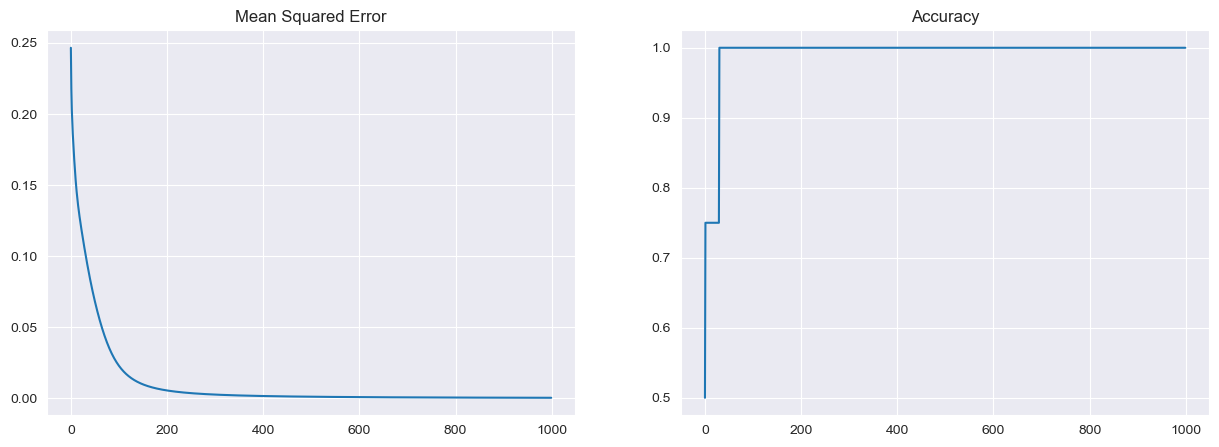

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_df.mse.plot(ax=axes[0], title="Mean Squared Error")
plot_df.accuracy.plot(ax=axes[1], title="Accuracy")